# [【SOTA】マイナビ × SIGNATE Student Cup 2019: 賃貸物件の家賃予測](https://signate.jp/competitions/264)

## 1. データ読み込み

In [343]:
import pandas as pd
import numpy as np
import pathlib
import os

# 学習データ、テストデータの読み込み
train_path = pathlib.Path("./DATA/train.csv")
test_path = pathlib.Path("./DATA/test.csv")

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [344]:
test_data.head()

,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,49年0ヶ月,南,50.22m2,8階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\tエレベーター\t公営水...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,鉄骨造,NaN
1,31472,東京都目黒区八雲１丁目11-8,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,1R,0年2ヶ月,南東,20.88m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCSアンテナ／\tBSアンテナ／\tインターネット使用料無料,エアコン付\tシューズボックス／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水／...,"駐車場\t近隣\t34,000円(税込)\t距離200m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 128m\t【スーパー】 313m\t【コンビニ】 374m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
2,31473,東京都豊島区池袋本町２丁目22-2,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,1K,23年4ヶ月,南東,26.93m2,1階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯...,"駐車場\t空有\t5,000円(税込)\t(敷金あり\t1ヶ月)\t駐輪場\t空有\tバイク...",【スーパー】 529m\t【スーパー】 810m\t【コンビニ】 316m\t【コンビニ】 ...,鉄骨造,2年間
3,31474,東京都杉並区和泉１丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩10分\t\t京王線\t代田橋駅\t徒歩8分...,1K,36年2ヶ月,南東,23.57m2,1階／2階建,シャワー,ガスコンロ／\t給湯,NaN,エアコン付\tシューズボックス／\t2面採光／\t室外洗濯機置場\t公営水道／\t下水／\t...,駐輪場\t空有\t0円,【スーパー】 286m\t【スーパー】 702m\t【コンビニ】 489m\t【コンビニ】 ...,木造,2年間
4,31475,東京都杉並区堀ノ内２丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩12分\t\t丸ノ内線(池袋－荻窪)\t新高...,2LDK,45年4ヶ月,南,50m2,4階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別,コンロ設置可（口数不明）／\t給湯,インターネット対応,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置...,"駐車場\t近隣\t22,600円\t距離177m",【コンビニ】 312m\t【コンビニ】 436m\t【スーパー】 902m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間


## 2. 前処理

### 2.1. データ選択

In [345]:
train_data_1 = train_data[["id", "アクセス", "所在地", "賃料", "間取り", "築年数", "面積", "所在階", "建物構造"]]
test_data_1 = test_data[["id", "アクセス", "所在地", "間取り", "築年数", "面積", "所在階", "建物構造"]]

### 2.2. 間取りの数値化

In [346]:
# 間取りにlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["間取り"],test_data_1["間取り"]]))

train_data_1["間取りID"] = le.transform(train_data_1["間取り"])
test_data_1["間取りID"] = le.transform(test_data_1["間取り"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 2.3. 面積の数値化

In [347]:
# 面積のカラムタイトルを面積[m2]に置換
train_data_1 = train_data_1.rename(columns={"面積": "面積m2"})
test_data_1 = test_data_1.rename(columns={"面積": "面積m2"})

In [348]:
# カラムタイトル面積[m2]の要素からm2を削除
train_data_1['面積m2'] = train_data_1['面積m2'].str.replace('m2', '').astype(float)
test_data_1['面積m2'] = test_data_1['面積m2'].str.replace('m2', '').astype(float)

### 2.4. 所在階の数値化

In [349]:
# 所在階の中身を"／"で2つの列に分割
train_data_1 = pd.concat([train_data_1, train_data_1['所在階'].str.split('／', expand=True)], axis=1)
test_data_1 = pd.concat([test_data_1, test_data_1['所在階'].str.split('／', expand=True)], axis=1)

In [350]:
# 分割した所在階のカラム名変更　0:所在、1:階層
train_data_1 = train_data_1.rename(columns={0:"所在", 1:"階層"})
test_data_1 = test_data_1.rename(columns={0:"所在", 1:"階層"})

In [351]:
# 所在と階層の要素を整形
train_data_1['所在'] = train_data_1['所在'].str.replace('階', '')
train_data_1['所在'] = train_data_1['所在'].str.replace('建', '')
train_data_1['所在'] = train_data_1['所在'].str.replace('地下', '-')
train_data_1['所在'] = train_data_1['所在'].str.replace('\（.*\）', '', regex=True)
train_data_1['階層'] = train_data_1['階層'].str.replace('階建', '')
train_data_1['階層'] = train_data_1['階層'].str.replace('\（.*\）', '', regex=True)
train_data_1['所在'] = train_data_1['所在'].replace('', np.nan)

test_data_1['所在'] = test_data_1['所在'].str.replace('階', '')
test_data_1['所在'] = test_data_1['所在'].str.replace('建', '')
test_data_1['所在'] = test_data_1['所在'].str.replace('地下', '-')
test_data_1['所在'] = test_data_1['所在'].str.replace('\（.*\）', '', regex=True)
test_data_1['階層'] = test_data_1['階層'].str.replace('階建', '')
test_data_1['階層'] = test_data_1['階層'].str.replace('\（.*\）', '', regex=True)
test_data_1['所在'] = test_data_1['所在'].replace('', np.nan)

In [352]:
# # "階層"がNoneの箇所を"所在"の値で埋める
# train_data_1['階層'].fillna(train_data_1['所在'], inplace=True)
# test_data_1['階層'].fillna(test_data_1['所在'], inplace=True)

In [353]:
# 所在と階層の要素をfloat型に変換する
train_data_1['所在'] = train_data_1['所在'].astype(float)
train_data_1['階層'] = train_data_1['階層'].astype(float)

test_data_1['所在'] = test_data_1['所在'].astype(float)
test_data_1['階層'] = test_data_1['階層'].astype(float)

In [354]:
# 所在階のカラムを削除
train_data_1 = train_data_1.drop('所在階', axis=1)
test_data_1 = test_data_1.drop('所在階', axis=1)

In [355]:
# # 所在も階層も空欄のデータは間取りと面積の近いデータで埋める
# print(test_data_1[(test_data_1["間取りID"] == 21) & (test_data_1["面積m2"] > 90) & (test_data_1["面積m2"] < 95)].mean())
# test_data_1.loc[test_data_1["id"]==40675, "所在"] = float(6)
# test_data_1.loc[test_data_1["id"]==40675, "階層"] = float(9)

### 2.5. 築年数の数値化

In [356]:
# 新築の場合は全て0にする
train_data_1.loc[train_data_1["築年数"]=="新築", "築年数"] = float(0)
test_data_1.loc[test_data_1["築年数"]=="新築", "築年数"] = float(0)

In [357]:
# 築年数を数値に変換する
train_data_1 = pd.concat([train_data_1, train_data_1['築年数'].str.split('年', expand=True)], axis=1)
test_data_1 = pd.concat([test_data_1, test_data_1['築年数'].str.split('年', expand=True)], axis=1)

In [358]:
# ヶ月を消す
train_data_1[1] = train_data_1[1].str.replace('ヶ月', '')
test_data_1[1] = test_data_1[1].str.replace('ヶ月', '')

In [359]:
# 築年数をfloat変換
train_data_1["築年数"] = train_data_1[0].astype(float) + (train_data_1[1].astype(float) / float(10))
test_data_1["築年数"] = test_data_1[0].astype(float) + (test_data_1[1].astype(float) / float(10))

In [360]:
test_data_1.head()

,id,アクセス,所在地,間取り,築年数,面積m2,建物構造,間取りID,所在,階層,0,1
0,31471,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,東京都世田谷区深沢５丁目1-27,2LDK,49.0,50.22,鉄骨造,14,8.0,8.0,49,0
1,31472,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,東京都目黒区八雲１丁目11-8,1R,0.2,20.88,RC（鉄筋コンクリート）,9,3.0,4.0,0,2
2,31473,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,東京都豊島区池袋本町２丁目22-2,1K,23.4,26.93,鉄骨造,3,1.0,4.0,23,4
3,31474,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩10分\t\t京王線\t代田橋駅\t徒歩8分...,東京都杉並区和泉１丁目,1K,36.2,23.57,木造,3,1.0,2.0,36,2
4,31475,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩12分\t\t丸ノ内線(池袋－荻窪)\t新高...,東京都杉並区堀ノ内２丁目,2LDK,45.4,50.00,RC（鉄筋コンクリート）,14,4.0,4.0,45,4


In [361]:
print(test_data_1[test_data_1["築年数"].isnull()])

          id                                               アクセス  \
77     31548  東急多摩川線\t矢口渡駅\t徒歩7分\t\t京浜東北線\t蒲田駅\t徒歩20分\t\t東急池...   
108    31579  東急田園都市線\t三軒茶屋駅\t徒歩8分\t\t東急世田谷線\t三軒茶屋駅\t徒歩9分\t\...   
112    31583  日比谷線\t仲御徒町駅\t徒歩6分\t\t山手線\t秋葉原駅\t徒歩9分\t\t山手線\t御...   
156    31627  京急本線\t大森海岸駅\t徒歩8分\t\t京浜東北線\t大森(東京都)駅\t徒歩11分\t\...   
162    31633  半蔵門線\t住吉(東京都)駅\t徒歩7分\t\t都営新宿線\t西大島駅\t徒歩23分\t\t...   
...      ...                                                ...   
31141  62612  小田急小田原線\t千歳船橋駅\t徒歩15分\t\t小田急小田原線\t祖師ケ谷大蔵駅\t徒歩1...   
31176  62647  東西線\t葛西駅\t徒歩10分\t\t東西線\t西葛西駅\t徒歩23分\t\t京葉線(東京－...   
31181  62652  都営大江戸線\t牛込柳町駅\t徒歩5分\t\t都営大江戸線\t若松河田駅\t徒歩6分\t\t...   
31182  62653  都営大江戸線\t牛込柳町駅\t徒歩5分\t\t都営大江戸線\t若松河田駅\t徒歩6分\t\t...   
31212  62683  都営大江戸線\t牛込柳町駅\t徒歩5分\t\t都営大江戸線\t若松河田駅\t徒歩6分\t\t...   

                    所在地       間取り  築年数   面積m2          建物構造  間取りID   所在    階層  \
77         東京都大田区東矢口２丁目  1K+S(納戸)  NaN  23.80           鉄骨造      4  2.0   3.0   
108    東京都世田谷区上馬２丁目26-8        1K

In [362]:
# 0と1の列を消す
train_data_1 = train_data_1.drop(0, axis=1)
train_data_1 = train_data_1.drop(1, axis=1)

test_data_1 = test_data_1.drop(0, axis=1)
test_data_1 = test_data_1.drop(1, axis=1)

### 2.6. 緯度経度情報の追加

#### [このサイト](https://ktgis.net/gcode/geocoding.html)を利用する

In [363]:
# IDと住所をファイル出力
train_coordinate = train_data[["id", "所在地"]]
test_coordinate = test_data[["id", "所在地"]]

train_coordinate.to_csv("train_coordinate.csv", header=False, index=False)
test_coordinate.to_csv("test_coordinate.csv", header=False, index=False)

In [364]:
# 緯度、経度情報の読み込み(id, 所在地, 経度, 緯度)
train_coordinate_addvalue = pd.read_excel("train_coordinate_addvalue.xlsx")
test_coordinate_addvalue = pd.read_excel("test_coordinate_addvalue.xlsx")

In [365]:
train_data_1 = pd.merge(train_data_1, train_coordinate_addvalue[["id", "経度", "緯度"]], on='id')
test_data_1 = pd.merge(test_data_1, test_coordinate_addvalue[["id", "経度", "緯度"]], on='id')

### 2.7. 部屋数の追加

In [366]:
# 部屋数のマージ
number_of_rooms = pd.read_excel("number_of_rooms.xlsx")
train_data_1 = pd.merge(train_data_1, number_of_rooms[["間取り", "部屋数"]], on='間取り')
test_data_1 = pd.merge(test_data_1, number_of_rooms[["間取り", "部屋数"]], on='間取り')

In [367]:
# インデックスの振り直し
train_data_1 = train_data_1.sort_values("id")
train_data_1 = train_data_1.reset_index(drop=True)

test_data_1 = test_data_1.sort_values("id")
test_data_1 = test_data_1.reset_index(drop=True)

### 2.8. 1部屋当たりの面積追加

In [368]:
# 面積と部屋数から1部屋当たりの面積を算出
train_data_1["1部屋当たり面積m2"] = (train_data_1["面積m2"] / train_data_1["部屋数"]).astype(float)
test_data_1["1部屋当たり面積m2"] = (test_data_1["面積m2"] / test_data_1["部屋数"]).astype(float)

In [369]:
# 間取りと間取りIDは削除する
train_data_1 = train_data_1.drop('間取り', axis=1)
test_data_1 = test_data_1.drop('間取り', axis=1)

# train_data_1 = train_data_1.drop('間取りID', axis=1)
# test_data_1 = test_data_1.drop('間取りID', axis=1)

#### 2.9. 建物の高さ率を追加(高さ率=所在/階層)

In [370]:
# 高さ率の算出
train_data_1["高さ率"] = (train_data_1["所在"] / train_data_1["階層"]).astype(float)
test_data_1["高さ率"] = (test_data_1["所在"] / test_data_1["階層"]).astype(float)

### 2.10. 建物構造の数値化

In [371]:
train_data_1["建物構造"].value_counts()

RC（鉄筋コンクリート）                   17505
木造                              5512
鉄骨造                             3726
SRC（鉄骨鉄筋コンクリート）                 2429
軽量鉄骨                            1812
ALC（軽量気泡コンクリート）                  297
その他                              136
PC（プレキャスト・コンクリート（鉄筋コンクリート））       46
HPC（プレキャスト・コンクリート（重量鉄骨））           4
ブロック                               3
Name: 建物構造, dtype: int64

In [372]:
# 建物構造にlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["建物構造"],test_data_1["建物構造"]]))

train_data_1["建物構造ID"] = le.transform(train_data_1["建物構造"])
test_data_1["建物構造ID"] = le.transform(test_data_1["建物構造"])

In [373]:
# 不要になった建物構造カラムを削除する
train_data_1 = train_data_1.drop('建物構造', axis=1)
test_data_1 = test_data_1.drop('建物構造', axis=1)

### 2.11. 新規カラムに「賃料/面積」を追加

In [374]:
train_data_1["賃料/面積"] = train_data_1["賃料"] / train_data_1["面積m2"]

### 2.12. 東京23区の地域ごとに、住宅地の平均地価情報を追加

In [375]:
# 区の情報の確認(23区だけだった)
# sample = train_data["所在地"].str.extract("東京都(.+区)", expand=True)
# sample.value_counts()

In [376]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [377]:
# 訓練データとテストデータに、エリア情報を追加
train_data_1["エリア"] = ""
test_data_1["エリア"] = ""
train_data_1["エリア"] = train_data_1["所在地"].str.extract("東京都((.+区.+?)[０-９]|(.+区.+?)[0-9]|(.+区.+))", expand=True)
test_data_1["エリア"] = test_data_1["所在地"].str.extract("東京都((.+区.+?)[０-９]|(.+区.+?)[0-9]|(.+区.+))", expand=True)

In [378]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [379]:
# 一部エリア情報に数値が残ってしまうので、消す
train_data_1["エリア"] = train_data_1["エリア"].str.replace("[０-９]|[0-9]", "")
train_data_1["エリア"] = train_data_1["エリア"].str.replace("一丁目", "")
train_data_1["エリア"] = train_data_1["エリア"].str.replace("-", "")

test_data_1["エリア"] = test_data_1["エリア"].str.replace("[０-９]|[0-9]", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("一丁目", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("二丁目", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("四丁目", "")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [380]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [381]:
# 坪単価情報の読込～結合
wards_value = pd.read_excel("23区_地域毎_坪単価.xlsx")
train_data_1 = pd.merge(train_data_1, wards_value, on="エリア", how="left")
test_data_1 = pd.merge(test_data_1, wards_value, on="エリア", how="left")
train_data_1 = train_data_1.sort_values("id")
test_data_1 = test_data_1.sort_values("id")

train_data_1 = train_data_1.drop("Unnamed: 4", axis=1)
test_data_1 = test_data_1.drop("Unnamed: 4", axis=1)

In [382]:
# 地価の抜けデータを平均値で補間
# 江東区
train_data_1.loc[train_data_1["id"]==2767, "区"] = "江東区"
train_data_1.loc[train_data_1["id"]==7559, "区"] = "江東区"
train_data_1.loc[train_data_1["id"]==2767, "平均坪単価（万円）"] = 206.6
train_data_1.loc[train_data_1["id"]==7559, "平均坪単価（万円）"] = 206.6
# 港区
train_data_1.loc[train_data_1["id"]==17654, "区"] = "港区"
train_data_1.loc[train_data_1["id"]==17654, "平均坪単価（万円）"] = 1321.4

In [383]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [384]:
print(train_data_1[train_data_1["平均坪単価（万円）"].isnull()])
print(test_data_1[test_data_1["平均坪単価（万円）"].isnull()])

Empty DataFrame
Columns: [id, アクセス, 所在地, 賃料, 築年数, 面積m2, 間取りID, 所在, 階層, 経度, 緯度, 部屋数, 1部屋当たり面積m2, 高さ率, 建物構造ID, 賃料/面積, エリア, 区, 地名, 平均坪単価（万円）]
Index: []
Empty DataFrame
Columns: [id, アクセス, 所在地, 築年数, 面積m2, 間取りID, 所在, 階層, 経度, 緯度, 部屋数, 1部屋当たり面積m2, 高さ率, 建物構造ID, エリア, 区, 地名, 平均坪単価（万円）]
Index: []


### 2.13. 区IDの追加

In [385]:
# # 区にlabel encodingを適用
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(pd.concat([train_data_1["区"],test_data_1["区"]]))

# train_data_1["区ID"] = le.transform(train_data_1["区"])
# test_data_1["区ID"] = le.transform(test_data_1["区"])

### 2.14. 六本木駅からの距離情報を追加

In [386]:
# 六本木駅からの距離を追加
# 六本木駅 緯度: 35.662725 経度: 139.731217
from geopy import Point
from geopy.distance import geodesic
from geopy.distance import distance

train_data_1["Roppongi_longtitude"] = 139.731217
train_data_1["Roppongi_latitude"] = 35.662725
train_data_1['point'] = train_data_1.apply(lambda row: Point(latitude=row['緯度'], longitude=row['経度']), axis=1)
train_data_1['point_next'] = train_data_1.apply(lambda row: Point(latitude=row['Roppongi_latitude'], longitude=row['Roppongi_longtitude']), axis=1)

test_data_1["Roppongi_longtitude"] = 139.731217
test_data_1["Roppongi_latitude"] = 35.662725
test_data_1['point'] = test_data_1.apply(lambda row: Point(latitude=row['緯度'], longitude=row['経度']), axis=1)
test_data_1['point_next'] = test_data_1.apply(lambda row: Point(latitude=row['Roppongi_latitude'], longitude=row['Roppongi_longtitude']), axis=1)

train_data_1['distance_km'] = train_data_1.apply(lambda row: distance(row['point'], row['point_next']).km if row['point_next'] is not None else float('nan'), axis=1)
test_data_1['distance_km'] = test_data_1.apply(lambda row: distance(row['point'], row['point_next']).km if row['point_next'] is not None else float('nan'), axis=1)

# 距離値を逆数にする　Reciprocal
train_data_1["Recciprocal_distance_km"] = (1 / train_data_1["distance_km"]).astype(float)
test_data_1["Recciprocal_distance_km"] = (1 / test_data_1["distance_km"]).astype(float)

In [387]:
# 不要なカラムを削除する
train_data_1 = train_data_1.drop(["Roppongi_longtitude", "Roppongi_latitude", "point", "point_next", "distance_km"], axis=1)
test_data_1 = test_data_1.drop(["Roppongi_longtitude", "Roppongi_latitude", "point", "point_next", "distance_km"], axis=1)

### 2.15. 欠損値を区の平均値で埋める

In [388]:
train_data_1["築年数"] = train_data_1.groupby('区')["築年数"].transform(lambda x:x.fillna(x.mean()))
train_data_1["所在"] = train_data_1.groupby('区')["所在"].transform(lambda x:x.fillna(x.mean()))
train_data_1["階層"] = train_data_1.groupby('区')["階層"].transform(lambda x:x.fillna(x.mean()))

test_data_1["築年数"] = test_data_1.groupby('区')["築年数"].transform(lambda x:x.fillna(x.mean()))
test_data_1["所在"] = test_data_1.groupby('区')["所在"].transform(lambda x:x.fillna(x.mean()))
test_data_1["階層"] = test_data_1.groupby('区')["階層"].transform(lambda x:x.fillna(x.mean()))

In [389]:
# 高さ率の更新
train_data_1["高さ率"] = (train_data_1["所在"] / train_data_1["階層"]).astype(float)
test_data_1["高さ率"] = (test_data_1["所在"] / test_data_1["階層"]).astype(float)

### 2.16. 最寄りの路線ID、駅IDと、そこからの徒歩分数を追加

In [390]:
# 徒歩分数の整理のために初回のみ出力
# test_data_1["路線情報"] = test_data_1["アクセス"].str.extract("(\d{1,2}分)", expand=True)
# train_data_1 = pd.concat([train_data_1, train_data_1['アクセス'].str.split('\t', expand=True)], axis=1).drop('アクセス', axis=1)
# test_data_1 = pd.concat([test_data_1, test_data_1['アクセス'].str.split('\t', expand=True)], axis=1).drop('アクセス', axis=1)

# train_access_1 = train_data_1[[0, 1, 2]]
# train_access_2 = train_data_1[[4, 5, 6]]
# train_access_3 = train_data_1[[8, 9, 10]]

# test_access_1 = test_data_1[[0, 1, 2]]
# test_access_2 = test_data_1[[4, 5, 6]]
# test_access_3 = test_data_1[[8, 9, 10]]

# train_access_1.to_excel("train_access_1.xlsx", header=True, index=False)
# train_access_2.to_excel("train_access_2.xlsx", header=True, index=False)
# train_access_3.to_excel("train_access_3.xlsx", header=True, index=False)

# test_access_1.to_excel("test_access_1.xlsx", header=True, index=False)
# test_access_2.to_excel("test_access_2.xlsx", header=True, index=False)
# test_access_3.to_excel("test_access_3.xlsx", header=True, index=False)

In [391]:
# 最寄り駅データの読み込み
train_access_result = pd.read_excel("./アクセス/train_access_result.xlsx")
test_access_result = pd.read_excel("./アクセス/test_access_result.xlsx")

# データ結合
train_data_1 = pd.concat([train_data_1, train_access_result], axis=1)
test_data_1 = pd.concat([test_data_1, test_access_result], axis=1)

# 徒歩分数とfloat型に変換する
train_data_1["徒歩分数"] = (train_data_1["徒歩分数"]).astype(float)
test_data_1["徒歩分数"] = (test_data_1["徒歩分数"]).astype(float)

In [392]:
# 路線名にlabel encodingを適用
le = LabelEncoder()
le.fit(pd.concat([train_data_1["路線名"],test_data_1["路線名"]]))

train_data_1["路線ID"] = le.transform(train_data_1["路線名"])
test_data_1["路線ID"] = le.transform(test_data_1["路線名"])

In [393]:
# 駅名にlabel encodingを適用
le = LabelEncoder()
le.fit(pd.concat([train_data_1["駅名"],test_data_1["駅名"]]))

train_data_1["駅ID"] = le.transform(train_data_1["駅名"])
test_data_1["駅ID"] = le.transform(test_data_1["駅名"])

In [394]:
# 不要なカラムを削除する
train_data_1 = train_data_1.drop(["アクセス", "所在地", "エリア", "区", "No.", "地名", "路線名", "駅名"], axis=1)
test_data_1 = test_data_1.drop(["アクセス", "所在地", "エリア", "区", "No.", "地名", "路線名", "駅名"], axis=1)

### 2.17. 重複物件の抽出・削除

In [395]:
# 重複確認用のデータ出力
# train_duplicate = pd.concat([train_data[["id", "賃料", "所在地"]], train_data_1[["間取りID", "面積m2", "所在", "階層"]]], axis=1)
# test_duplicate = pd.concat([test_data[["id", "所在地"]], test_data_1[["間取りID", "面積m2", "所在", "階層"]]], axis=1)

In [396]:
# 結果の出力
# train_duplicate.to_excel("train_duplicate.xlsx", header=True, index=False)
# test_duplicate.to_excel("test_duplicate.xlsx", header=True, index=False)

In [397]:
# 重複対象のデータ読み込み
train_duplicate_flag = pd.read_excel("train_duplicate_flag.xlsx")
test_duplicate_flag = pd.read_excel("test_duplicate_flag.xlsx")

In [398]:
# データ数のチェック
print("Train:", len(train_data_1), "-", len(train_duplicate_flag), "=", len(train_data_1)-len(train_duplicate_flag))
print("Test:", len(test_data_1), "-", len(test_duplicate_flag), "=", len(test_data_1)-len(test_duplicate_flag))

Train: 31470 - 31470 = 0
Test: 31262 - 31262 = 0


In [399]:
# 重複フラグを結合
train_data_1 = pd.merge(train_data_1, train_duplicate_flag, on="id")
train_data_1 = train_data_1.rename(columns={"賃料_x":"賃料"})
train_data_1 = train_data_1.drop('賃料_y', axis=1)

test_data_1 = pd.merge(test_data_1, test_duplicate_flag, on="id")

In [400]:
# testデータからのみ、flag=1.0の列を削除
print("【削除前】", "train:", len(train_data_1), ", ", "test:", len(test_data_1))
#train_data_1 = train_data_1.loc[train_data_1["flag"] != 1.0]
test_data_1 = test_data_1.loc[test_data_1["flag"] != 1.0]
print("【削除後】", "train:", len(train_data_1), ", ", "test:", len(test_data_1))

【削除前】 train: 31470 ,  test: 31262
【削除後】 train: 31470 ,  test: 24812


## 3. データチェック

In [401]:
train_data_1.isnull().sum()

id                             0
賃料                             0
築年数                            0
面積m2                           0
間取りID                          0
所在                             0
階層                             0
経度                             0
緯度                             0
部屋数                            0
1部屋当たり面積m2                     0
高さ率                            0
建物構造ID                         0
賃料/面積                          0
平均坪単価（万円）                      0
Recciprocal_distance_km        0
徒歩分数                           0
路線ID                           0
駅ID                            0
flag                       25975
dtype: int64

In [402]:
test_data_1.isnull().sum()

id                             0
築年数                            0
面積m2                           0
間取りID                          0
所在                             0
階層                             0
経度                             0
緯度                             0
部屋数                            0
1部屋当たり面積m2                     0
高さ率                            0
建物構造ID                         0
平均坪単価（万円）                      0
Recciprocal_distance_km        0
徒歩分数                           0
路線ID                           0
駅ID                            0
flag                       24812
dtype: int64

In [403]:
len(train_data_1)

31470

In [404]:
len(train_data)

31470

In [405]:
len(test_data_1)

24812

In [406]:
len(test_data)

31262

In [407]:
train_data_1.head()

,id,賃料,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,賃料/面積,平均坪単価（万円）,Recciprocal_distance_km,徒歩分数,路線ID,駅ID,flag
0,1,75000,9.9,20.01,3,1.0,12.0,139.727873,35.747759,1.0,20.01,0.083333,3,3748.125937,180.0,0.105936,4.0,57,405,NaN
1,2,76000,45.0,16.50,9,5.0,10.0,139.780485,35.662406,1.0,16.50,0.500000,10,4606.060606,323.0,0.224156,5.0,58,90,1.0
2,3,110000,8.6,22.05,3,12.0,15.0,139.667375,35.675358,1.0,22.05,0.800000,3,4988.662132,324.0,0.168132,6.0,15,355,NaN
3,4,150000,29.4,60.48,14,3.0,4.0,139.648495,35.700193,3.5,17.28,0.750000,3,2480.158730,253.0,0.116755,3.0,5,217,NaN
4,5,74000,31.7,39.66,10,1.0,2.0,139.872315,35.766413,3.0,13.22,0.500000,7,1865.859808,111.0,0.058186,5.0,11,62,NaN


In [408]:
test_data_1.head()

,id,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,平均坪単価（万円）,Recciprocal_distance_km,徒歩分数,路線ID,駅ID,flag
0,31471,49.0,50.22,14,8.0,8.0,139.652762,35.617708,3.5,14.348571,1.00,10,208.0,0.115133,15.0,35,356,NaN
1,31472,0.2,20.88,9,3.0,4.0,139.672871,35.617709,1.0,20.880000,0.75,3,273.0,0.137527,6.0,36,438,NaN
2,31473,23.4,26.93,3,1.0,4.0,139.709049,35.741996,1.0,26.930000,0.25,10,186.0,0.110849,10.0,44,95,NaN
3,31474,36.2,23.57,3,1.0,2.0,139.658270,35.673602,1.0,23.570000,0.50,7,184.0,0.148943,8.0,15,73,NaN
5,31476,25.6,21.45,9,1.0,2.0,139.686023,35.691395,1.0,21.450000,0.50,7,294.0,0.192956,4.0,58,408,NaN


## 4.学習 

In [409]:
# IDとflagの削除
train_data_1_no_ID = train_data_1.drop(["id", "flag"], axis=1)
test_data_1_no_ID = test_data_1.drop(["id", "flag"], axis=1)

In [410]:
# 特徴データと目的変数の設定
train_x = train_data_1_no_ID.drop(["賃料", "賃料/面積"], axis=1)
train_y = train_data_1_no_ID["賃料/面積"]

test_x = test_data_1_no_ID

In [411]:
# import xgboost as xgb
# from xgboost import XGBClassifier
# from sklearn.metrics import log_loss, accuracy_score
# from sklearn.model_selection import KFold

# scores = []
# # GBDT用のハイパーパラメータ
# params = {"objective": "reg:squarederror", "sileng":1, "random_state":71, "eval_metric":"rmse"}
# num_round = 50

# # クロスバリデーション
# kf = KFold(n_splits=4, shuffle=True, random_state=71)
# for tr_idx, va_idx, in kf.split(train_x):
#     tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
#     tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
#     # GBDTで学習実行
#     dtrain = xgb.DMatrix(tr_x, label=tr_y) # enable_categorical=True
#     dvalid = xgb.DMatrix(va_x, label=va_y)
#     dtest = xgb.DMatrix(test_x)
    
#     watchlist = [(dtrain, "train"), (dvalid, "eval")]
#     model = xgb.train(params, dtrain, num_round, evals=watchlist)

In [412]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold

import pandas as pd
from sklearn.decomposition import PCA
import math
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

# 2つの値から角度を求めて、配列を返す関数
def make_radian_row(pca_result):
    rad = []
    for r in pca_result:
        rad.append(math.atan(r[0]/r[1]))

    return rad

scores = []
# GBDT用のハイパーパラメータ
params = {"objective": "reg:squarederror", "sileng":1, "random_state":71, "eval_metric":"rmse"}
num_round = 50

# クロスバリデーション
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx, in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
    # PCA用にNaNを含むカラムを削除する
#     tr_pca = tr_x.drop(["築年数", "所在", "階層", "高さ率"], axis=1)
#     va_pca = va_x.drop(["築年数", "所在", "階層", "高さ率"], axis=1)

    # 主成分分析
    pca = PCA(n_components=2)
    pca.fit(tr_x)
    
    # 角度データの追加
    tr_x["rad"] = make_radian_row(pca.transform(tr_x))
    va_x["rad"] = make_radian_row(pca.transform(va_x))
#     test_x["rad"] = make_radian_row(pca.transform(test_x))

    # PCAで出力した角度情報を元データに結合
#     tr_x = pd.concat([tr_x, tr_pca["rad"]], axis=1)
#     va_x = pd.concat([va_x, va_pca["rad"]], axis=1)
    
    # GBDTで学習実行
    dtrain = xgb.DMatrix(tr_x, label=tr_y) # enable_categorical=True
    dvalid = xgb.DMatrix(va_x, label=va_y)
#     dtest = xgb.DMatrix(test_x)
    
    watchlist = [(dtrain, "train"), (dvalid, "eval")]
    model = xgb.train(params, dtrain, num_round, evals=watchlist)
    
    tr_x = tr_x.drop("rad", axis=1)
    va_x = va_x.drop("rad", axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[20:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sileng" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:2639.88062	eval-rmse:2609.94019
[1]	train-rmse:1894.03308	eval-rmse:1861.74915
[2]	train-rmse:1377.03308	eval-rmse:1352.00037
[3]	train-rmse:1026.30530	eval-rmse:1006.21399
[4]	train-rmse:797.40448	eval-rmse:780.20758
[5]	train-rmse:650.62915	eval-rmse:640.72626
[6]	train-rmse:557.99292	eval-rmse:555.80682
[7]	train-rmse:501.53391	eval-rmse:510.35345
[8]	train-rmse:467.40781	eval-rmse:485.12830
[9]	train-rmse:447.52280	eval-rmse:470.41782
[10]	train-rmse:420.06238	eval-rmse:484.87082
[11]	train-rmse:412.09387	eval-rmse:478.90942
[12]	train-rmse:393.24091	eval-rmse:471.33514
[13]	train-rmse:38

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[20:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sileng" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:2616.28638	eval-rmse:2689.14868
[1]	train-rmse:1867.00928	eval-rmse:1966.50854
[2]	train-rmse:1348.82788	eval-rmse:1483.40918
[3]	train-rmse:996.50195	eval-rmse:1171.83032
[4]	train-rmse:758.49573	eval-rmse:975.76227
[5]	train-rmse:603.31049	eval-rmse:859.44116
[6]	train-rmse:505.84082	eval-rmse:794.12726
[7]	train-rmse:446.20621	eval-rmse:758.34619
[8]	train-rmse:411.53485	eval-rmse:739.36401
[9]	train-rmse:388.17471	eval-rmse:726.77173
[10]	train-rmse:373.84921	eval-rmse:718.36511
[11]	train-rmse:364.33777	eval-rmse:713.86060
[12]	train-rmse:357.43320	eval-rmse:711.67633
[13]	train-rmse:351

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[20:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sileng" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:2638.92993	eval-rmse:2614.77368
[1]	train-rmse:1897.48816	eval-rmse:1870.11731
[2]	train-rmse:1384.50940	eval-rmse:1355.68066
[3]	train-rmse:1040.45557	eval-rmse:1007.98852
[4]	train-rmse:802.22192	eval-rmse:776.84992
[5]	train-rmse:644.57520	eval-rmse:628.88355
[6]	train-rmse:551.40887	eval-rmse:536.15826
[7]	train-rmse:496.11334	eval-rmse:481.09036
[8]	train-rmse:460.50555	eval-rmse:448.60199
[9]	train-rmse:436.29065	eval-rmse:430.35361
[10]	train-rmse:424.55884	eval-rmse:419.95761
[11]	train-rmse:404.02124	eval-rmse:412.04215
[12]	train-rmse:395.99200	eval-rmse:406.03043
[13]	train-rmse:39

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[20:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sileng" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:2635.53687	eval-rmse:2633.69482
[1]	train-rmse:1891.35876	eval-rmse:1895.95251
[2]	train-rmse:1373.08826	eval-rmse:1394.40308
[3]	train-rmse:1020.18030	eval-rmse:1067.04468
[4]	train-rmse:782.30750	eval-rmse:864.99127
[5]	train-rmse:625.04187	eval-rmse:750.10809
[6]	train-rmse:525.20630	eval-rmse:694.80646
[7]	train-rmse:462.10544	eval-rmse:654.11005
[8]	train-rmse:421.94608	eval-rmse:630.38800
[9]	train-rmse:396.43497	eval-rmse:631.97607
[10]	train-rmse:379.40842	eval-rmse:636.77722
[11]	train-rmse:367.93417	eval-rmse:630.21747
[12]	train-rmse:361.11969	eval-rmse:626.16931
[13]	train-rmse:35

## 5. 検証

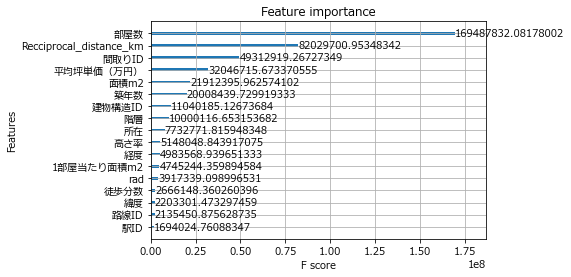

In [413]:
# 特徴量の予測結果への貢献度(Fスコア)を可視化
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
font = {'family' : 'Meiryo'} # matplotlibのデフォルトフォントをTakaoGothicに設定
plt.rc('font', **font)
xgb.plot_importance(model, importance_type = "gain")
plt.show()

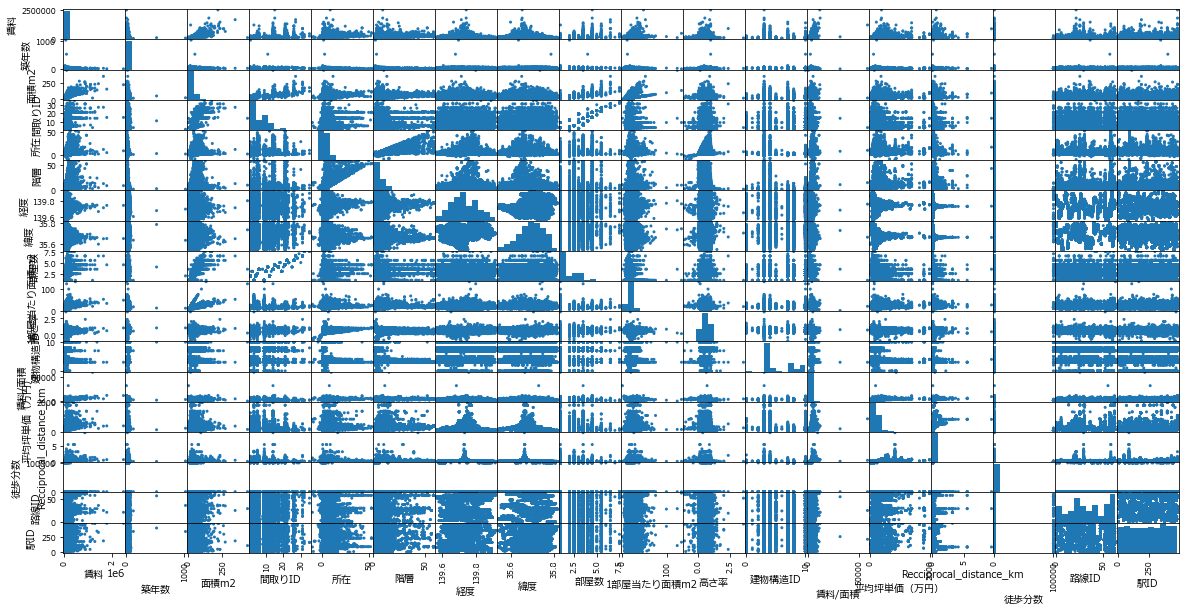

In [414]:
# ヒストグラムと散布図の行列を作成
from pandas.plotting import scatter_matrix
x = scatter_matrix(train_data_1_no_ID, alpha=1, figsize=(20, 10), diagonal='hist')

[9.98933737e-01 6.00662015e-04]


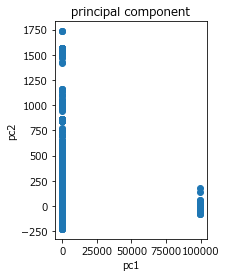

In [415]:
# PCA分析結果を可視化する
transformed = pca.fit_transform(tr_x)

# 主成分をプロットする
plt.subplot(1, 2, 2)
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の次元ごとの寄与率を出力する
print(pca.explained_variance_ratio_)
# グラフを表示する
plt.show()

## 6. 予測

In [416]:
tr_x.head()

,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,平均坪単価（万円）,Recciprocal_distance_km,徒歩分数,路線ID,駅ID
0,9.9,20.01,3,1.0,12.0,139.727873,35.747759,1.0,20.010000,0.083333,3,180.0,0.105936,4.0,57,405
1,45.0,16.50,9,5.0,10.0,139.780485,35.662406,1.0,16.500000,0.500000,10,323.0,0.224156,5.0,58,90
2,8.6,22.05,3,12.0,15.0,139.667375,35.675358,1.0,22.050000,0.800000,3,324.0,0.168132,6.0,15,355
3,29.4,60.48,14,3.0,4.0,139.648495,35.700193,3.5,17.280000,0.750000,3,253.0,0.116755,3.0,5,217
5,7.6,50.80,14,6.0,12.0,139.795759,35.732019,3.5,14.514286,0.500000,3,149.0,0.103565,2.0,27,108


In [417]:
test_x.head()

,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,平均坪単価（万円）,Recciprocal_distance_km,徒歩分数,路線ID,駅ID
0,49.0,50.22,14,8.0,8.0,139.652762,35.617708,3.5,14.348571,1.00,10,208.0,0.115133,15.0,35,356
1,0.2,20.88,9,3.0,4.0,139.672871,35.617709,1.0,20.880000,0.75,3,273.0,0.137527,6.0,36,438
2,23.4,26.93,3,1.0,4.0,139.709049,35.741996,1.0,26.930000,0.25,10,186.0,0.110849,10.0,44,95
3,36.2,23.57,3,1.0,2.0,139.658270,35.673602,1.0,23.570000,0.50,7,184.0,0.148943,8.0,15,73
5,25.6,21.45,9,1.0,2.0,139.686023,35.691395,1.0,21.450000,0.50,7,294.0,0.192956,4.0,58,408


In [418]:
# テストデータでの予測
# PCA用にNaNを含むカラムを削除する
# test_x_pca = test_x.drop(["築年数", "所在", "階層", "高さ率"], axis=1)

# 角度データの追加
test_x["rad"] = make_radian_row(pca.transform(test_x))

# # PCAで出力した角度情報を元データに結合
# test_x = pd.concat([test_x, test_x_pca["rad"]], axis=1)

dtest = xgb.DMatrix(test_x)
pred = model.predict(dtest)

In [419]:
pred

array([2451.066 , 5411.457 , 3122.1533, ..., 4465.535 , 3872.8745,
       3815.8994], dtype=float32)

In [420]:
len(pred)

24812

In [421]:
len(test_data_1)

24812

## 7. データ出力

In [422]:
# 予測結果の結合
test_data_1["賃料/面積"] = pred

In [423]:
# 予測結果から賃料を算出し、int型に変換
test_data_1["賃料"] = (test_data_1["面積m2"] * test_data_1["賃料/面積"]).astype(int)

In [424]:
result = test_data_1[["id", "賃料"]]

In [425]:
result

,id,賃料
0,31471,123092
1,31472,112991
2,31473,84079
3,31474,62291
5,31476,74019
...,...,...
31255,62726,99163
31257,62728,105888
31258,62729,101412
31259,62730,177222


In [426]:
len(result)

24812

In [427]:
# 除外していた重複idの賃料を戻す
test_duplicate_rentvalue = pd.read_excel("test_duplicate_rentvalue.xlsx")
result = pd.concat([result, test_duplicate_rentvalue])
result = result.sort_values("id")
len(result)

31262

In [428]:
result

,id,賃料
0,31471,123092
1,31472,112991
2,31473,84079
3,31474,62291
0,31475,90000
...,...,...
31257,62728,105888
31258,62729,101412
31259,62730,177222
6449,62731,280000


In [429]:
result.to_csv("result.csv", header=False, index=False)